# KMeans Clustering Project 

We will use the Iris dataset and use the Kmeans cluster algorithm to try to identify optimum number of clusters (species of Iris).
We will not use the 'Species' column for this exercise since KMeans Clustering algorithm is an unsupervised learning algorithm.


**Import the Iris dataset from seaborn.**

In [1]:
import seaborn as sns
iris_df = sns.load_dataset('iris')

In [2]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Create a new dataframe without 'species' column.** 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
iris = pd.DataFrame(iris_df[['petal_length','petal_width','sepal_length','sepal_width']])
iris.head()

,petal_length,petal_width,sepal_length,sepal_width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

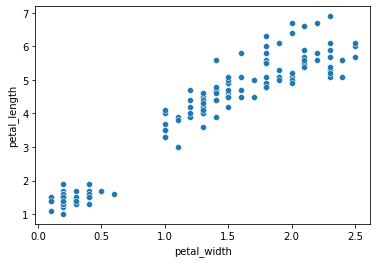

In [5]:
sns.scatterplot(data= iris, x='petal_width',y='petal_length')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

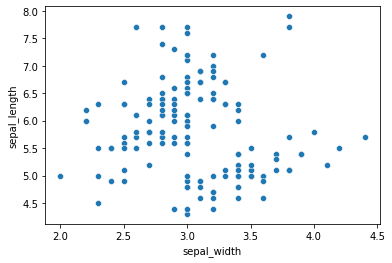

In [6]:
sns.scatterplot(data= iris, x='sepal_width',y='sepal_length')

Visually, we can identify 2 clear clusters based on petal and sepal characteristics.

### Create a KMeans Cluster Model

starting off with k=3.

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3)
prediction = model.fit_predict(iris)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
iris['predicted_species'] = prediction
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,predicted_species
0,1.4,0.2,5.1,3.5,1
1,1.4,0.2,4.9,3.0,1
2,1.3,0.2,4.7,3.2,1
3,1.5,0.2,4.6,3.1,1
4,1.4,0.2,5.0,3.6,1


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

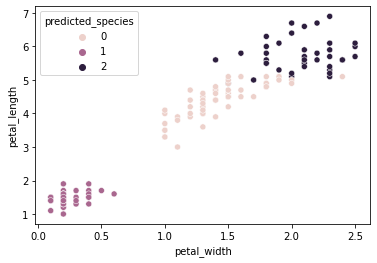

In [10]:
sns.scatterplot(data=iris, x='petal_width',y='petal_length',hue='predicted_species')

The graphs shows 1 clear cluster and 2 clusters not so clearly differentiated.

**Let's use the elbow method to identify the optimum number of clusters for this dataset**

In [11]:
sse = []
k_range = range(1,11)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(iris)
    sse.append(model.inertia_)

C:\Users\ZFATMI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:>

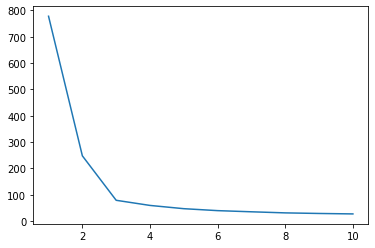

In [12]:
sns.lineplot(x=k_range,y=sse)

Elbow plot shows that 3 clusters would be optimum based on their sse. 

**Let's check how our clustering from KMeans compare with the actual species clusters from the original dataset**

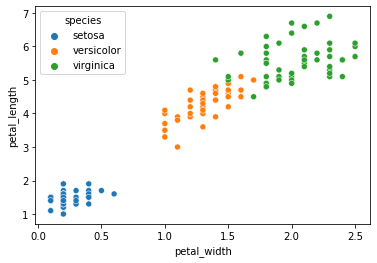

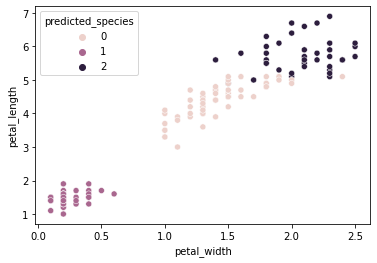

In [13]:
sns.scatterplot(data=iris_df, x='petal_width',y='petal_length',hue='species')
plt.show()
sns.scatterplot(data=iris, x='petal_width',y='petal_length',hue='predicted_species')
plt.show()

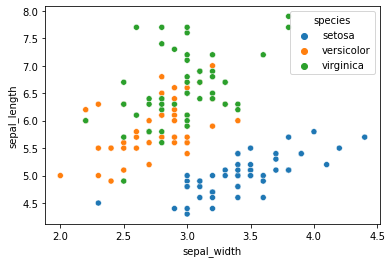

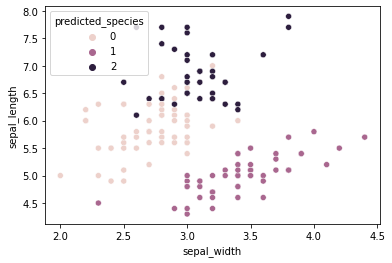

In [14]:
sns.scatterplot(data=iris_df, x='sepal_width',y='sepal_length',hue='species')
plt.show()
sns.scatterplot(data=iris, x='sepal_width',y='sepal_length',hue='predicted_species')
plt.show()

Cluster=1 identifies all the 'setosa' species correctly.

Clusters 0 and 2 identify most of the 'veriscolor' and 'virginica' species correctly but there are multiple wrongly identified species in the overlapping region. 